### Image Mask Manipulation
Exported image masks from [ilastik](https://www.ilastik.org/) can be mapped together in python:

In [1]:
import sys
from fzl_utils import *
%matplotlib inline

In [ ]:
# reload functions when editing file
del sys.modules['fzl_utils']
from fzl_utils import *

---

In [2]:
# read in binary .npy export from ilastik
seg1 = seg.from_file(datafile='inputs/IHC_RegisteredToPreAF_pyramid_1_SimpleSegmentation.npy')
seg1.dims # check for dimensions of object in pixels

(776, 1254)

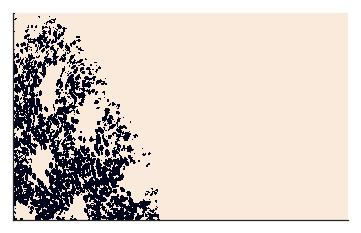

In [3]:
seg1.plot() # show the image

In [4]:
# segment IDs are 1 and 2, for the two labels trained in ilastik
print('Unique values in mask file: ' + str(seg1.seg_IDs))

Unique values in mask file: [1. 2.]


---

In [5]:
# now read in probabilities output from ilastik
prob1 = prob.from_file(datafile='inputs/IHC_RegisteredToPreAF_pyramid_1_Probabilities.npy')
prob1.dims

(2, 776, 1254)

In [6]:
# probability data is split into a dictionary where keys are segment IDs from [1,] 
print(prob1.data.keys())
prob1.seg_IDs
# (these should match)

dict_keys([1, 2])


array([1, 2], dtype=uint8)

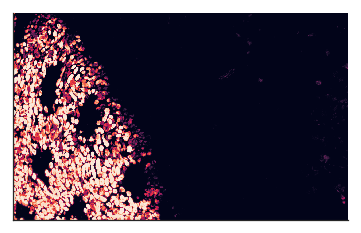

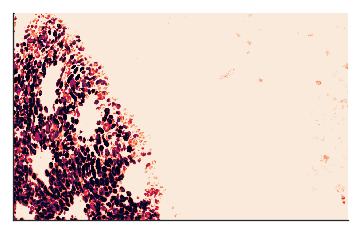

In [7]:
# we can now plot probabilities for both segment IDs, which in this case are inverses of one another since there's two of them
prob1.plot(seg_ID=1)
prob1.plot(seg_ID=2)

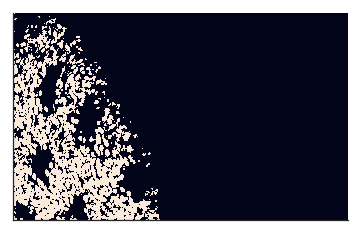

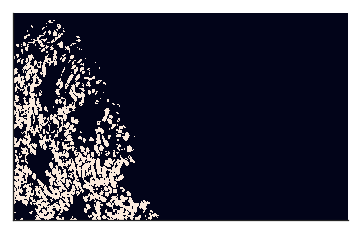

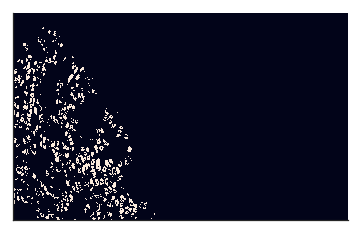

In [8]:
# threshold seg_ID 1 at different levels to look at output
prob1_1_50 = prob1.prob_threshold(seg_ID=1, threshmax=0.5, plot_out=True)
prob1_1_75 = prob1.prob_threshold(seg_ID=1, threshmax=0.75, plot_out=True)
prob1_1_98 = prob1.prob_threshold(seg_ID=1, threshmax=0.98, plot_out=True)

---

Read in all of the testing snippets from ilastik

In [12]:
# this is super ugly
for file in [x for x in os.walk('inputs')][0][2]:
    if '2' in file.split('_'):
        if 'Probabilities.npy' in file.split('_'):
            prob2 = prob.from_file(datafile='inputs/'+file)
    if '3' in file.split('_'):
        if 'Probabilities.npy' in file.split('_'):
            prob3 = prob.from_file(datafile='inputs/'+file)
    if '4' in file.split('_'):
        if 'Probabilities.npy' in file.split('_'):
            prob4 = prob.from_file(datafile='inputs/'+file)
    if '5' in file.split('_'):
        if 'Probabilities.npy' in file.split('_'):
            prob5 = prob.from_file(datafile='inputs/'+file)
    if '6' in file.split('_'):
        if 'Probabilities.npy' in file.split('_'):
            prob6 = prob.from_file(datafile='inputs/'+file)

In [13]:
seg2 = seg(prob2.prob_threshold())
seg3 = seg(prob3.prob_threshold())
seg4 = seg(prob4.prob_threshold())
seg5 = seg(prob5.prob_threshold())
seg6 = seg(prob6.prob_threshold())

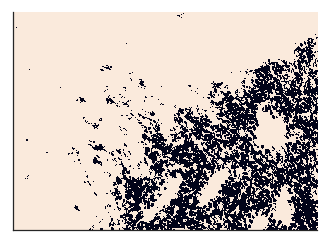

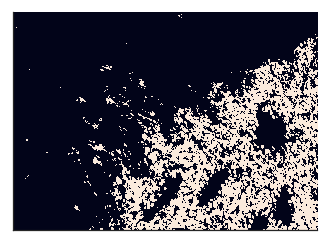

In [14]:
# looks like they use a default 0.5 threshold for simple segmentation in ilastik
prob2.prob_threshold(seg_ID=2, threshmax=0.5, plot_out=True)
seg2.plot()

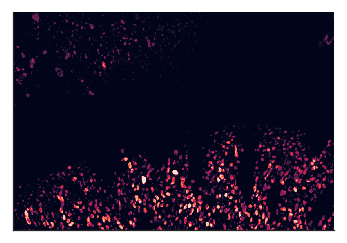

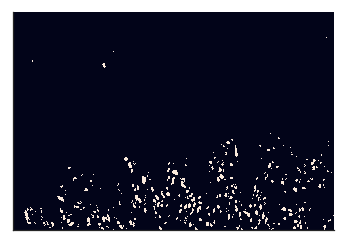

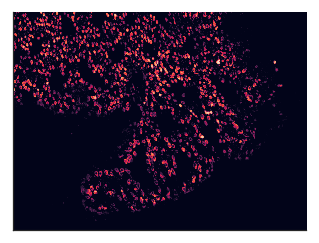

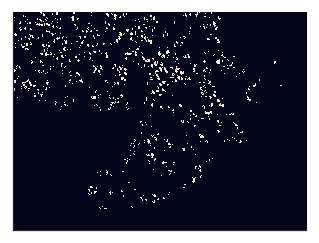

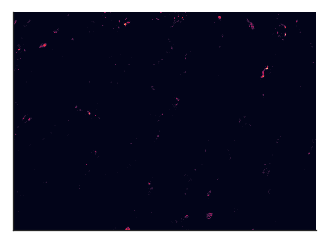

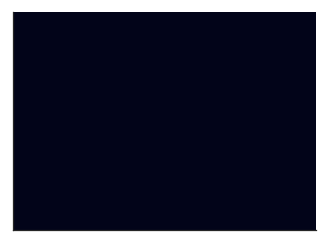

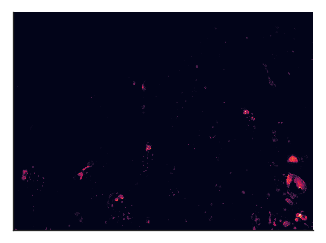

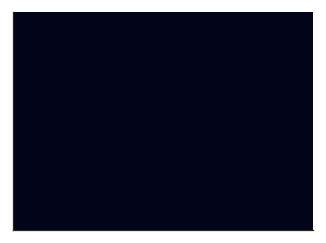

In [15]:
prob3.plot()
seg3.plot()
prob4.plot()
seg4.plot()
prob5.plot()
seg5.plot()
prob6.plot()
seg6.plot()

---

In [16]:
# create stack of probability matrices for a certain segment ID
%time prob1_stack = prob_stack(masks = [prob1, prob1, prob1, prob1, prob1])

CPU times: user 13 s, sys: 869 ms, total: 13.9 s
Wall time: 14.1 s


In [17]:
# visualize probability stacks for both segments in 3D using `pptk`
prob1_stack.visualize(seg_ID=1)
prob1_stack.visualize(seg_ID=2)

In [18]:
# create stack of simple segment matrices
%time seg1_stack = seg_stack(masks = [seg1, seg1, seg1, seg1, seg1])

CPU times: user 6.43 s, sys: 394 ms, total: 6.83 s
Wall time: 6.9 s


In [19]:
# visualize segment stacks in 3D using `pptk`
seg1_stack.visualize()

---

In [16]:
%%time
# threshold seg_ID 1 at different levels to look at output in 3D
thres_stack = seg_stack(masks = [seg(prob1_1_50), seg(prob1_1_75), seg(prob1_1_98)])

CPU times: user 11.1 s, sys: 370 ms, total: 11.5 s
Wall time: 12.2 s


In [19]:
thres_stack.visualize()